# Demo MODIS snow presence over Mt. Rainier, WA

### Installs and imports

In [ ]:
#!pip install -q -e 'git+https://github.com/egagli/easysnowdata.git#egg=easysnowdata'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rasterio
import rioxarray
import easysnowdata
import modis_masking
#import dask_gateway

/home/eric/miniconda3/envs/new_global_snowmelt_runoff_onset/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Let's first do a quick test to make sure this is doing what we'd like...

In [2]:
def create_3x3_test_grid():
    """Create a 3x3 spatial grid with 9 different snow test scenarios using exact MODIS dates"""
    
    # Create MODIS 8-day composite dates from 2014 to 2024
    # This will give us data spanning water years 2015-2024
    real_dates = ['2014-09-30T00:00:00.000000000', '2014-10-08T00:00:00.000000000',
        '2014-10-16T00:00:00.000000000', '2014-10-24T00:00:00.000000000',
        '2014-11-01T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-17T00:00:00.000000000', '2014-11-25T00:00:00.000000000',
        '2014-12-03T00:00:00.000000000', '2014-12-11T00:00:00.000000000',
        '2014-12-19T00:00:00.000000000', '2014-12-27T00:00:00.000000000',
        '2015-01-01T00:00:00.000000000', '2015-01-09T00:00:00.000000000',
        '2015-01-17T00:00:00.000000000', '2015-01-25T00:00:00.000000000',
        '2015-02-02T00:00:00.000000000', '2015-02-10T00:00:00.000000000',
        '2015-02-18T00:00:00.000000000', '2015-02-26T00:00:00.000000000',
        '2015-03-06T00:00:00.000000000', '2015-03-14T00:00:00.000000000',
        '2015-03-22T00:00:00.000000000', '2015-03-30T00:00:00.000000000',
        '2015-04-07T00:00:00.000000000', '2015-04-15T00:00:00.000000000',
        '2015-04-23T00:00:00.000000000', '2015-05-01T00:00:00.000000000',
        '2015-05-09T00:00:00.000000000', '2015-05-17T00:00:00.000000000',
        '2015-05-25T00:00:00.000000000', '2015-06-02T00:00:00.000000000',
        '2015-06-10T00:00:00.000000000', '2015-06-18T00:00:00.000000000',
        '2015-06-26T00:00:00.000000000', '2015-07-04T00:00:00.000000000',
        '2015-07-12T00:00:00.000000000', '2015-07-20T00:00:00.000000000',
        '2015-07-28T00:00:00.000000000', '2015-08-05T00:00:00.000000000',
        '2015-08-13T00:00:00.000000000', '2015-08-21T00:00:00.000000000',
        '2015-08-29T00:00:00.000000000', '2015-09-06T00:00:00.000000000',
        '2015-09-14T00:00:00.000000000', '2015-09-22T00:00:00.000000000',
        '2015-09-30T00:00:00.000000000', '2015-10-08T00:00:00.000000000',
        '2015-10-16T00:00:00.000000000', '2015-10-24T00:00:00.000000000',
        '2015-11-01T00:00:00.000000000', '2015-11-09T00:00:00.000000000',
        '2015-11-17T00:00:00.000000000', '2015-11-25T00:00:00.000000000',
        '2015-12-03T00:00:00.000000000', '2015-12-11T00:00:00.000000000',
        '2015-12-19T00:00:00.000000000', '2015-12-27T00:00:00.000000000',
        '2016-01-01T00:00:00.000000000', '2016-01-09T00:00:00.000000000',
        '2016-01-17T00:00:00.000000000', '2016-01-25T00:00:00.000000000',
        '2016-02-02T00:00:00.000000000', '2016-02-10T00:00:00.000000000',
        '2016-02-18T00:00:00.000000000', '2016-02-26T00:00:00.000000000',
        '2016-03-05T00:00:00.000000000', '2016-03-13T00:00:00.000000000',
        '2016-03-21T00:00:00.000000000', '2016-03-29T00:00:00.000000000',
        '2016-04-06T00:00:00.000000000', '2016-04-14T00:00:00.000000000',
        '2016-04-22T00:00:00.000000000', '2016-04-30T00:00:00.000000000',
        '2016-05-08T00:00:00.000000000', '2016-05-16T00:00:00.000000000',
        '2016-05-24T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
        '2016-06-09T00:00:00.000000000', '2016-06-17T00:00:00.000000000',
        '2016-06-25T00:00:00.000000000', '2016-07-03T00:00:00.000000000',
        '2016-07-11T00:00:00.000000000', '2016-07-19T00:00:00.000000000',
        '2016-07-27T00:00:00.000000000', '2016-08-04T00:00:00.000000000',
        '2016-08-12T00:00:00.000000000', '2016-08-20T00:00:00.000000000',
        '2016-08-28T00:00:00.000000000', '2016-09-05T00:00:00.000000000',
        '2016-09-13T00:00:00.000000000', '2016-09-21T00:00:00.000000000',
        '2016-09-29T00:00:00.000000000', '2016-10-07T00:00:00.000000000',
        '2016-10-15T00:00:00.000000000', '2016-10-23T00:00:00.000000000',
        '2016-10-31T00:00:00.000000000', '2016-11-08T00:00:00.000000000',
        '2016-11-16T00:00:00.000000000', '2016-11-24T00:00:00.000000000',
        '2016-12-02T00:00:00.000000000', '2016-12-10T00:00:00.000000000',
        '2016-12-18T00:00:00.000000000', '2016-12-26T00:00:00.000000000',
        '2017-01-01T00:00:00.000000000', '2017-01-09T00:00:00.000000000',
        '2017-01-17T00:00:00.000000000', '2017-01-25T00:00:00.000000000',
        '2017-02-02T00:00:00.000000000', '2017-02-10T00:00:00.000000000',
        '2017-02-18T00:00:00.000000000', '2017-02-26T00:00:00.000000000',
        '2017-03-06T00:00:00.000000000', '2017-03-14T00:00:00.000000000',
        '2017-03-22T00:00:00.000000000', '2017-03-30T00:00:00.000000000',
        '2017-04-07T00:00:00.000000000', '2017-04-15T00:00:00.000000000',
        '2017-04-23T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
        '2017-05-09T00:00:00.000000000', '2017-05-17T00:00:00.000000000',
        '2017-05-25T00:00:00.000000000', '2017-06-02T00:00:00.000000000',
        '2017-06-10T00:00:00.000000000', '2017-06-18T00:00:00.000000000',
        '2017-06-26T00:00:00.000000000', '2017-07-04T00:00:00.000000000',
        '2017-07-12T00:00:00.000000000', '2017-07-20T00:00:00.000000000',
        '2017-07-28T00:00:00.000000000', '2017-08-05T00:00:00.000000000',
        '2017-08-13T00:00:00.000000000', '2017-08-21T00:00:00.000000000',
        '2017-08-29T00:00:00.000000000', '2017-09-06T00:00:00.000000000',
        '2017-09-14T00:00:00.000000000', '2017-09-22T00:00:00.000000000',
        '2017-09-30T00:00:00.000000000', '2017-10-08T00:00:00.000000000',
        '2017-10-16T00:00:00.000000000', '2017-10-24T00:00:00.000000000',
        '2017-11-01T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
        '2017-11-17T00:00:00.000000000', '2017-11-25T00:00:00.000000000',
        '2017-12-03T00:00:00.000000000', '2017-12-11T00:00:00.000000000',
        '2017-12-19T00:00:00.000000000', '2017-12-27T00:00:00.000000000',
        '2018-01-01T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
        '2018-01-17T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
        '2018-02-02T00:00:00.000000000', '2018-02-10T00:00:00.000000000',
        '2018-02-18T00:00:00.000000000', '2018-02-26T00:00:00.000000000',
        '2018-03-06T00:00:00.000000000', '2018-03-14T00:00:00.000000000',
        '2018-03-22T00:00:00.000000000', '2018-03-30T00:00:00.000000000',
        '2018-04-07T00:00:00.000000000', '2018-04-15T00:00:00.000000000',
        '2018-04-23T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
        '2018-05-09T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
        '2018-05-25T00:00:00.000000000', '2018-06-02T00:00:00.000000000',
        '2018-06-10T00:00:00.000000000', '2018-06-18T00:00:00.000000000',
        '2018-06-26T00:00:00.000000000', '2018-07-04T00:00:00.000000000',
        '2018-07-12T00:00:00.000000000', '2018-07-20T00:00:00.000000000',
        '2018-07-28T00:00:00.000000000', '2018-08-05T00:00:00.000000000',
        '2018-08-13T00:00:00.000000000', '2018-08-21T00:00:00.000000000',
        '2018-08-29T00:00:00.000000000', '2018-09-06T00:00:00.000000000',
        '2018-09-14T00:00:00.000000000', '2018-09-22T00:00:00.000000000',
        '2018-09-30T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
        '2018-10-16T00:00:00.000000000', '2018-10-24T00:00:00.000000000',
        '2018-11-01T00:00:00.000000000', '2018-11-09T00:00:00.000000000',
        '2018-11-17T00:00:00.000000000', '2018-11-25T00:00:00.000000000',
        '2018-12-03T00:00:00.000000000', '2018-12-11T00:00:00.000000000',
        '2018-12-19T00:00:00.000000000', '2018-12-27T00:00:00.000000000',
        '2019-01-01T00:00:00.000000000', '2019-01-09T00:00:00.000000000',
        '2019-01-17T00:00:00.000000000', '2019-01-25T00:00:00.000000000',
        '2019-02-02T00:00:00.000000000', '2019-02-10T00:00:00.000000000',
        '2019-02-18T00:00:00.000000000', '2019-02-26T00:00:00.000000000',
        '2019-03-06T00:00:00.000000000', '2019-03-14T00:00:00.000000000',
        '2019-03-22T00:00:00.000000000', '2019-03-30T00:00:00.000000000',
        '2019-04-07T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
        '2019-04-23T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
        '2019-05-09T00:00:00.000000000', '2019-05-17T00:00:00.000000000',
        '2019-05-25T00:00:00.000000000', '2019-06-02T00:00:00.000000000',
        '2019-06-10T00:00:00.000000000', '2019-06-18T00:00:00.000000000',
        '2019-06-26T00:00:00.000000000', '2019-07-04T00:00:00.000000000',
        '2019-07-12T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
        '2019-07-28T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
        '2019-08-13T00:00:00.000000000', '2019-08-21T00:00:00.000000000',
        '2019-08-29T00:00:00.000000000', '2019-09-06T00:00:00.000000000',
        '2019-09-14T00:00:00.000000000', '2019-09-22T00:00:00.000000000',
        '2019-09-30T00:00:00.000000000', '2019-10-08T00:00:00.000000000',
        '2019-10-16T00:00:00.000000000', '2019-10-24T00:00:00.000000000',
        '2019-11-01T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
        '2019-11-17T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
        '2019-12-03T00:00:00.000000000', '2019-12-11T00:00:00.000000000',
        '2019-12-19T00:00:00.000000000', '2019-12-27T00:00:00.000000000',
        '2020-01-01T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
        '2020-01-17T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
        '2020-02-02T00:00:00.000000000', '2020-02-10T00:00:00.000000000',
        '2020-02-18T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
        '2020-03-05T00:00:00.000000000', '2020-03-13T00:00:00.000000000',
        '2020-03-21T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
        '2020-04-06T00:00:00.000000000', '2020-04-14T00:00:00.000000000',
        '2020-04-22T00:00:00.000000000', '2020-04-30T00:00:00.000000000',
        '2020-05-08T00:00:00.000000000', '2020-05-16T00:00:00.000000000',
        '2020-05-24T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
        '2020-06-09T00:00:00.000000000', '2020-06-17T00:00:00.000000000',
        '2020-06-25T00:00:00.000000000', '2020-07-03T00:00:00.000000000',
        '2020-07-11T00:00:00.000000000', '2020-07-19T00:00:00.000000000',
        '2020-07-27T00:00:00.000000000', '2020-08-04T00:00:00.000000000',
        '2020-08-12T00:00:00.000000000', '2020-08-20T00:00:00.000000000',
        '2020-08-28T00:00:00.000000000', '2020-09-05T00:00:00.000000000',
        '2020-09-13T00:00:00.000000000', '2020-09-21T00:00:00.000000000',
        '2020-09-29T00:00:00.000000000', '2020-10-07T00:00:00.000000000',
        '2020-10-15T00:00:00.000000000', '2020-10-23T00:00:00.000000000',
        '2020-10-31T00:00:00.000000000', '2020-11-08T00:00:00.000000000',
        '2020-11-16T00:00:00.000000000', '2020-11-24T00:00:00.000000000',
        '2020-12-02T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
        '2020-12-18T00:00:00.000000000', '2020-12-26T00:00:00.000000000',
        '2021-01-01T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
        '2021-01-17T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
        '2021-02-02T00:00:00.000000000', '2021-02-10T00:00:00.000000000',
        '2021-02-18T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
        '2021-03-06T00:00:00.000000000', '2021-03-14T00:00:00.000000000',
        '2021-03-22T00:00:00.000000000', '2021-03-30T00:00:00.000000000',
        '2021-04-07T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
        '2021-04-23T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
        '2021-05-09T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-25T00:00:00.000000000', '2021-06-02T00:00:00.000000000',
        '2021-06-10T00:00:00.000000000', '2021-06-18T00:00:00.000000000',
        '2021-06-26T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
        '2021-07-12T00:00:00.000000000', '2021-07-20T00:00:00.000000000',
        '2021-07-28T00:00:00.000000000', '2021-08-05T00:00:00.000000000',
        '2021-08-13T00:00:00.000000000', '2021-08-21T00:00:00.000000000',
        '2021-08-29T00:00:00.000000000', '2021-09-06T00:00:00.000000000',
        '2021-09-14T00:00:00.000000000', '2021-09-22T00:00:00.000000000',
        '2021-09-30T00:00:00.000000000', '2021-10-08T00:00:00.000000000',
        '2021-10-16T00:00:00.000000000', '2021-10-24T00:00:00.000000000',
        '2021-11-01T00:00:00.000000000', '2021-11-09T00:00:00.000000000',
        '2021-11-17T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
        '2021-12-03T00:00:00.000000000', '2021-12-11T00:00:00.000000000',
        '2021-12-19T00:00:00.000000000', '2021-12-27T00:00:00.000000000',
        '2022-01-01T00:00:00.000000000', '2022-01-09T00:00:00.000000000',
        '2022-01-17T00:00:00.000000000', '2022-01-25T00:00:00.000000000',
        '2022-02-02T00:00:00.000000000', '2022-02-10T00:00:00.000000000',
        '2022-02-18T00:00:00.000000000', '2022-02-26T00:00:00.000000000',
        '2022-03-06T00:00:00.000000000', '2022-03-14T00:00:00.000000000',
        '2022-03-22T00:00:00.000000000', '2022-03-30T00:00:00.000000000',
        '2022-04-07T00:00:00.000000000', '2022-04-15T00:00:00.000000000',
        '2022-04-23T00:00:00.000000000', '2022-05-01T00:00:00.000000000',
        '2022-05-09T00:00:00.000000000', '2022-05-17T00:00:00.000000000',
        '2022-05-25T00:00:00.000000000', '2022-06-02T00:00:00.000000000',
        '2022-06-10T00:00:00.000000000', '2022-06-18T00:00:00.000000000',
        '2022-06-26T00:00:00.000000000', '2022-07-04T00:00:00.000000000',
        '2022-07-12T00:00:00.000000000', '2022-07-20T00:00:00.000000000',
        '2022-07-28T00:00:00.000000000', '2022-08-05T00:00:00.000000000',
        '2022-08-13T00:00:00.000000000', '2022-08-21T00:00:00.000000000',
        '2022-08-29T00:00:00.000000000', '2022-09-06T00:00:00.000000000',
        '2022-09-14T00:00:00.000000000', '2022-09-22T00:00:00.000000000',
        '2022-09-30T00:00:00.000000000', '2022-10-08T00:00:00.000000000',
        '2022-10-16T00:00:00.000000000', '2022-10-24T00:00:00.000000000',
        '2022-11-01T00:00:00.000000000', '2022-11-09T00:00:00.000000000',
        '2022-11-17T00:00:00.000000000', '2022-11-25T00:00:00.000000000',
        '2022-12-03T00:00:00.000000000', '2022-12-11T00:00:00.000000000',
        '2022-12-19T00:00:00.000000000', '2022-12-27T00:00:00.000000000',
        '2023-01-17T00:00:00.000000000', '2023-01-25T00:00:00.000000000',
        '2023-02-02T00:00:00.000000000', '2023-02-10T00:00:00.000000000',
        '2023-02-18T00:00:00.000000000', '2023-02-26T00:00:00.000000000',
        '2023-03-06T00:00:00.000000000', '2023-03-14T00:00:00.000000000',
        '2023-03-22T00:00:00.000000000', '2023-03-30T00:00:00.000000000',
        '2023-04-07T00:00:00.000000000', '2023-04-15T00:00:00.000000000',
        '2023-04-23T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
        '2023-05-09T00:00:00.000000000', '2023-05-17T00:00:00.000000000',
        '2023-05-25T00:00:00.000000000', '2023-06-02T00:00:00.000000000',
        '2023-06-10T00:00:00.000000000', '2023-06-18T00:00:00.000000000',
        '2023-06-26T00:00:00.000000000', '2023-07-04T00:00:00.000000000',
        '2023-07-12T00:00:00.000000000', '2023-07-20T00:00:00.000000000',
        '2023-07-28T00:00:00.000000000', '2023-08-05T00:00:00.000000000',
        '2023-08-13T00:00:00.000000000', '2023-08-21T00:00:00.000000000',
        '2023-08-29T00:00:00.000000000', '2023-09-06T00:00:00.000000000',
        '2023-09-14T00:00:00.000000000', '2023-09-22T00:00:00.000000000',
        '2023-09-30T00:00:00.000000000', '2023-10-08T00:00:00.000000000',
        '2023-10-16T00:00:00.000000000', '2023-10-24T00:00:00.000000000',
        '2023-11-01T00:00:00.000000000', '2023-11-09T00:00:00.000000000',
        '2023-11-17T00:00:00.000000000', '2023-11-25T00:00:00.000000000',
        '2023-12-03T00:00:00.000000000', '2023-12-11T00:00:00.000000000',
        '2023-12-19T00:00:00.000000000', '2023-12-27T00:00:00.000000000',
        '2024-01-01T00:00:00.000000000', '2024-01-09T00:00:00.000000000',
        '2024-01-17T00:00:00.000000000', '2024-01-25T00:00:00.000000000',
        '2024-02-02T00:00:00.000000000', '2024-02-10T00:00:00.000000000',
        '2024-02-18T00:00:00.000000000', '2024-02-26T00:00:00.000000000',
        '2024-03-05T00:00:00.000000000', '2024-03-13T00:00:00.000000000',
        '2024-03-21T00:00:00.000000000', '2024-03-29T00:00:00.000000000',
        '2024-04-06T00:00:00.000000000', '2024-04-14T00:00:00.000000000',
        '2024-04-22T00:00:00.000000000', '2024-04-30T00:00:00.000000000',
        '2024-05-08T00:00:00.000000000', '2024-05-16T00:00:00.000000000',
        '2024-05-24T00:00:00.000000000', '2024-06-01T00:00:00.000000000',
        '2024-06-09T00:00:00.000000000', '2024-06-17T00:00:00.000000000',
        '2024-06-25T00:00:00.000000000', '2024-07-03T00:00:00.000000000',
        '2024-07-11T00:00:00.000000000', '2024-07-19T00:00:00.000000000',
        '2024-07-27T00:00:00.000000000', '2024-08-04T00:00:00.000000000',
        '2024-08-12T00:00:00.000000000', '2024-08-20T00:00:00.000000000',
        '2024-08-28T00:00:00.000000000', '2024-09-05T00:00:00.000000000',
        '2024-09-13T00:00:00.000000000', '2024-09-21T00:00:00.000000000',
        '2024-09-29T00:00:00.000000000']    
    
    dates = pd.to_datetime(real_dates)
    # Filter to match your actual data range (2014-09-30 to 2024-09-29)
    # Find the closest MODIS dates to these bounds
    start_date = pd.Timestamp('2014-09-30')
    end_date = pd.Timestamp('2024-09-29')
    
    # Filter dates to be within the range
    dates = dates[(dates >= start_date) & (dates <= end_date)]
    n_times = len(dates)
        
    # Calculate approximate observations per water year 
    n_years = 10
    obs_per_wy = n_times // n_years
    
    # Define the 9 test cases - patterns that repeat over the time series
    test_cases = {
        (0,0): [200] * n_times,  # 1. All snow case (permanent snow)
        
        (0,1): [25] * n_times,   # 2. No snow case (permanent no snow)
        
        # 3. Consistent seasonal pattern (snow for ~20 periods, no snow for ~26 periods per year)
        (0,2): ([200] * 20 + [25] * 26) * (n_times // 46 + 1),
        
        # 4. Changing snow seasons (shorter then longer)
        (1,0): ([200] * 15 + [25] * 31) * (n_times // 92 + 1) + ([200] * 25 + [25] * 21) * (n_times // 92 + 1),
        
        # 5. Snow seasons ending with clouds
        (1,1): ([200] * 30 + [50] * 16) * (n_times // 46 + 1),
        
        # 6. Snow seasons starting with clouds  
        (1,2): ([50] * 10 + [200] * 36) * (n_times // 46 + 1),
        
        # 7. Complex cloud/darkness pattern
        (2,0): ([50, 50, 200] + [11] * 5 + [50, 200] + [25] * 37) * (n_times // 46 + 1),
        
        # 8. Alternating snow/no snow pattern
        (2,1): ([200, 25] * 23) * (n_times // 46 + 1),
        
        # 9. All clouds (permanent clouds)
        (2,2): [50] * n_times,
    }
    
    # Create 3D array (x, y, time)
    test_array = np.zeros((3, 3, n_times), dtype=np.int16)
    
    # Fill the array with test cases
    for (x, y), pattern in test_cases.items():
        # Truncate pattern to match exact number of time steps
        if len(pattern) >= n_times:
            test_array[x, y, :] = pattern[:n_times]
        else:
            # Repeat and truncate pattern to fill the time series
            full_pattern = (pattern * ((n_times // len(pattern)) + 1))[:n_times]
            test_array[x, y, :] = full_pattern
    
    # Create xarray DataArray
    da = xr.DataArray(
        test_array,
        dims=['x', 'y', 'time'],
        coords={
            'x': range(3),
            'y': range(3),
            'time': dates
        }
    )
    
    # Add water year and DOWY coordinates
    hemisphere = 'northern'
    da.coords['water_year'] = ("time", pd.to_datetime(da.time).map(
        lambda x: easysnowdata.utils.datetime_to_WY(x, hemisphere=hemisphere)
    ))
    da.coords['DOWY'] = ("time", pd.to_datetime(da.time).map(
        lambda x: easysnowdata.utils.datetime_to_DOWY(x, hemisphere=hemisphere)
    ))
    
    # Create description mapping for reference
    case_descriptions = {
        (0,0): "Permanent snow (10 years)",
        (0,1): "Permanent no snow (10 years)", 
        (0,2): "Consistent seasonal pattern",
        (1,0): "Changing snow season length",
        (1,1): "Snow seasons ending with clouds",
        (1,2): "Snow seasons starting with clouds", 
        (2,0): "Complex cloud/darkness/snow pattern",
        (2,1): "Alternating snow/no snow",
        (2,2): "Permanent clouds (10 years)"
    }
    
    return da, case_descriptions

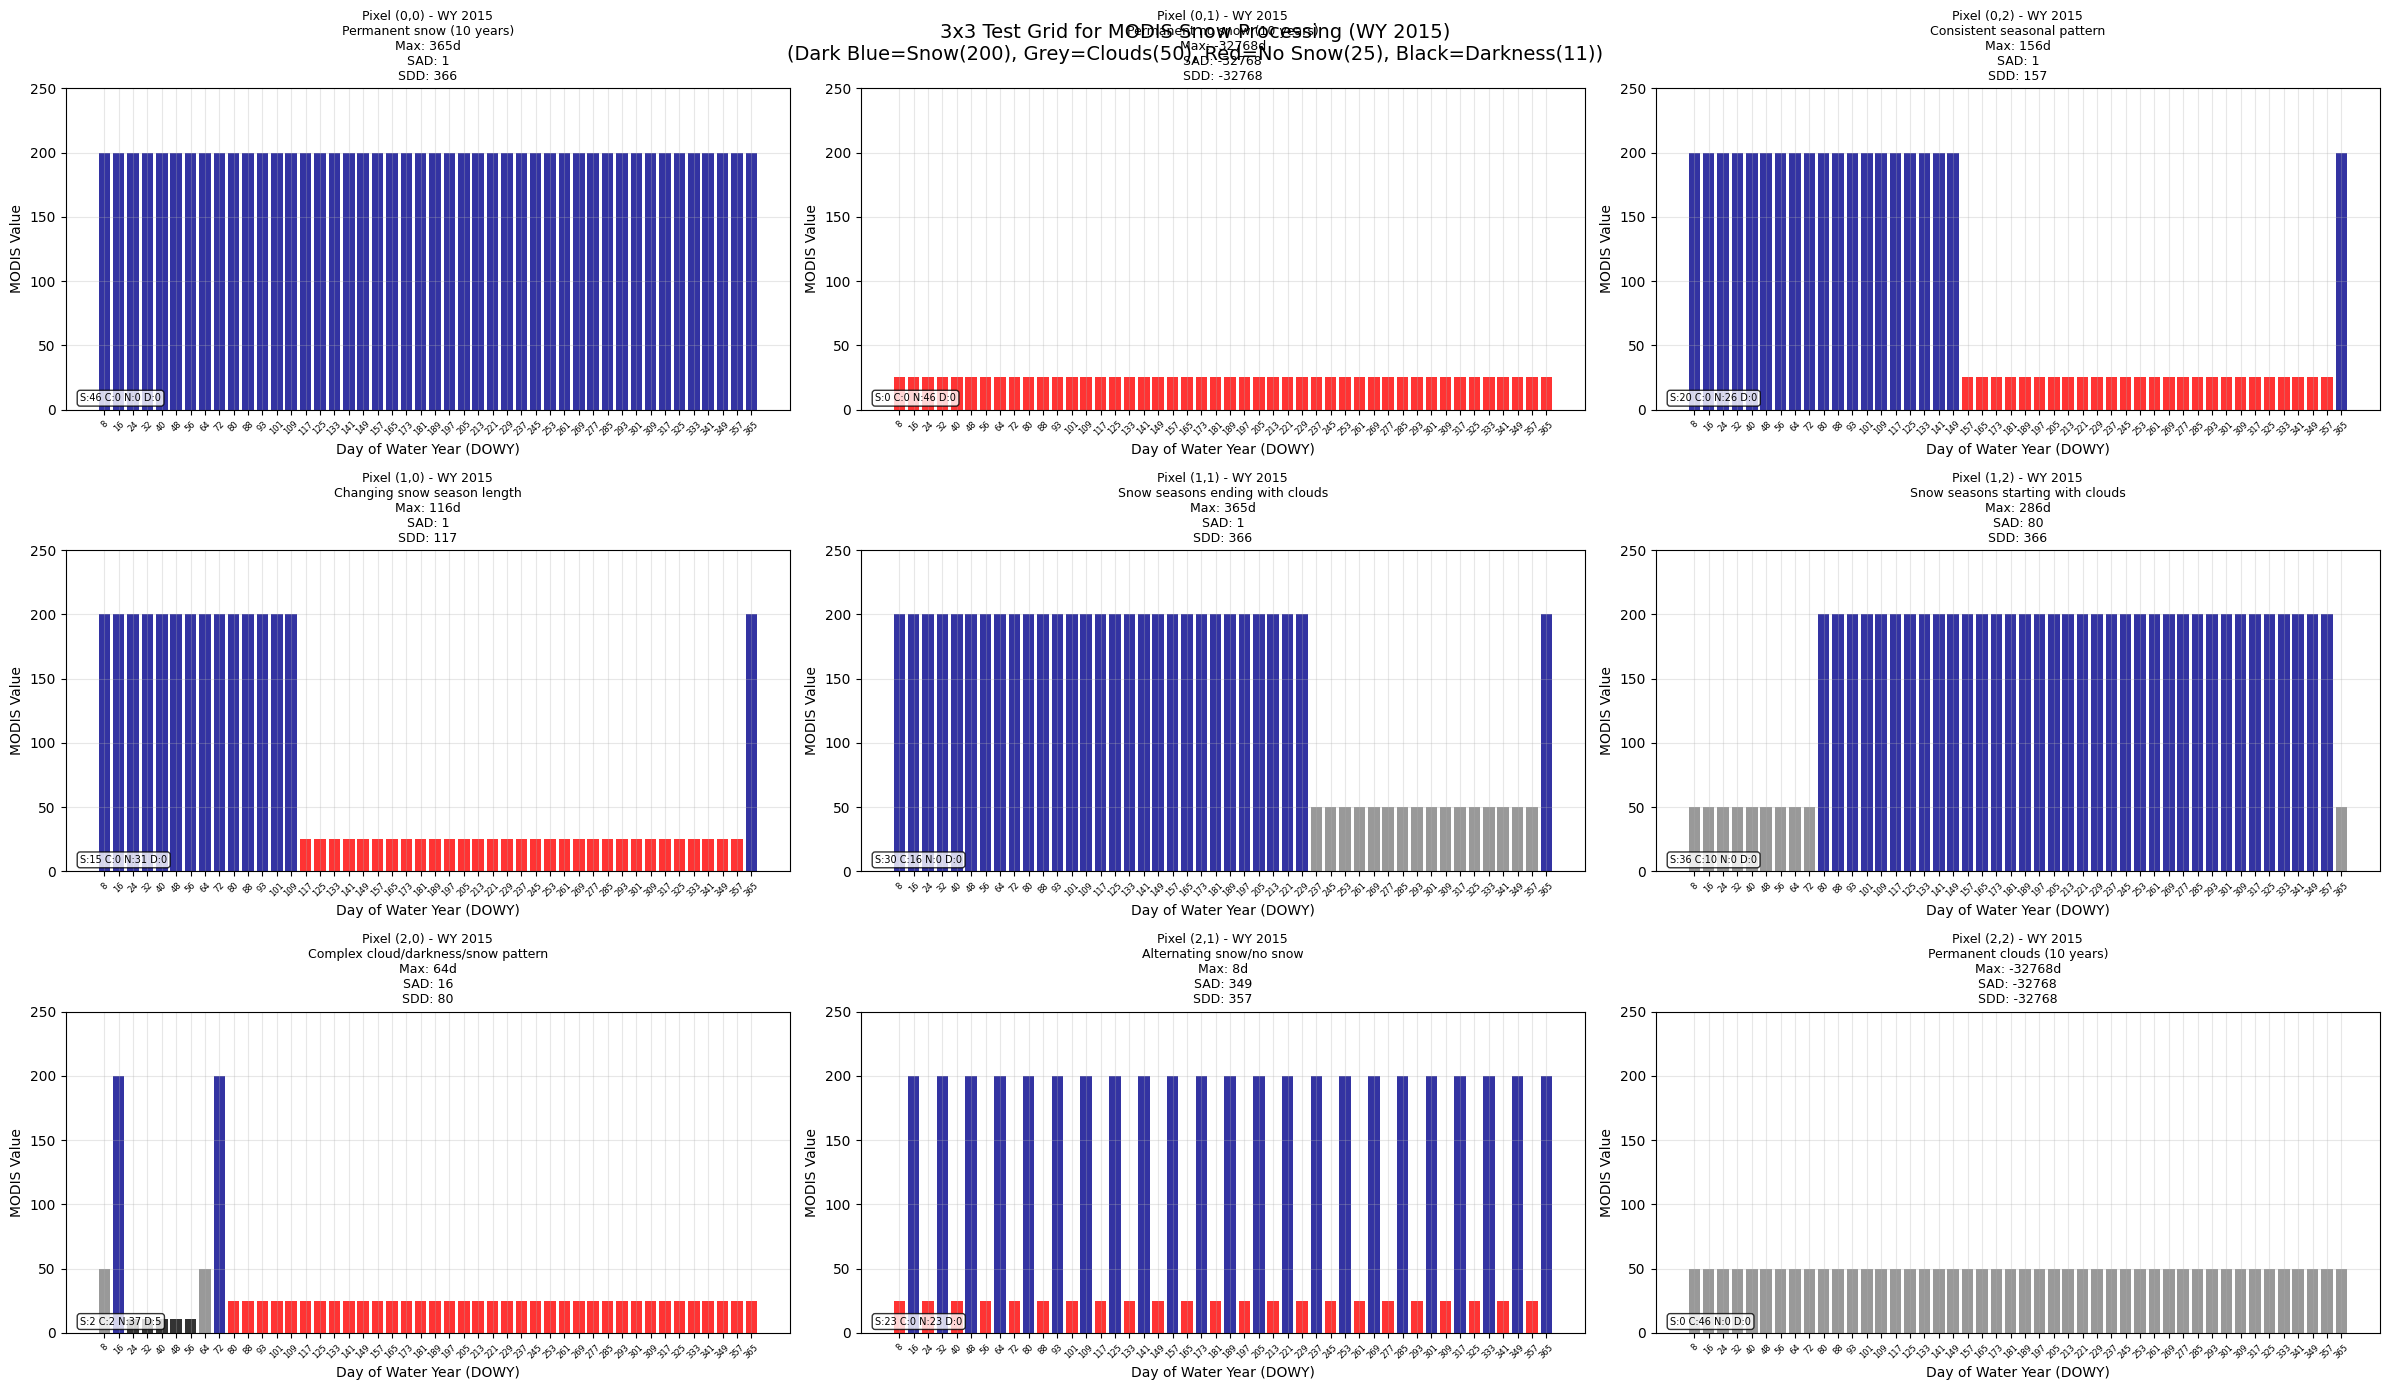

Test grid created with shape: (3, 3, 459)
Time range: 2014-09-30T00:00:00.000000000 to 2024-09-29T00:00:00.000000000
Number of time steps: 459

Case descriptions:
  Pixel (0, 0): Permanent snow (10 years)
  Pixel (0, 1): Permanent no snow (10 years)
  Pixel (0, 2): Consistent seasonal pattern
  Pixel (1, 0): Changing snow season length
  Pixel (1, 1): Snow seasons ending with clouds
  Pixel (1, 2): Snow seasons starting with clouds
  Pixel (2, 0): Complex cloud/darkness/snow pattern
  Pixel (2, 1): Alternating snow/no snow
  Pixel (2, 2): Permanent clouds (10 years)


In [4]:
def visualize_3x3_test_grid():
    """Visualize the 3x3 test grid with calculated metrics"""
    
    test_da, descriptions = create_3x3_test_grid()
    
    # Calculate metrics for each pixel using your processing pipeline
    effective_snow = modis_masking.binarize_with_cloud_filling(test_da)
    effective_snow_complete_wys = modis_masking.align_wy_start(effective_snow, hemisphere='northern')
    seasonal_metrics = effective_snow_complete_wys.groupby('water_year').apply(
        modis_masking.get_max_consec_snow_days_SAD_SDD_one_WY
    ).compute()
    
    # Use WY 2015 metrics (first complete water year)
    wy_2015_metrics = seasonal_metrics.sel(water_year=2015)
    
    fig, axes = plt.subplots(3, 3, figsize=(24, 14))
    
    for i in range(3):
        for j in range(3):
            ax = axes[i, j]
            
            # Get time series for this pixel - filter to WY 2015 for visualization
            pixel_data_wy2015 = test_da.where(test_da.water_year == 2015, drop=True).isel(x=i, y=j)
            pixel_values = pixel_data_wy2015.values
            dowy_values = pixel_data_wy2015.DOWY.values
            
            # Create color-coded bar plot
            colors = []
            for v in pixel_values:
                if v == 200:  # Snow
                    colors.append('darkblue')
                elif v == 50:  # Clouds
                    colors.append('grey')
                elif v == 25:  # No snow
                    colors.append('red')
                elif v == 11:  # Darkness
                    colors.append('black')
                else:  # Other values
                    colors.append('purple')
            
            # Create bar plot
            bars = ax.bar(range(len(pixel_values)), pixel_values, color=colors, alpha=0.8)
            
            # Get metrics for this pixel (WY 2015)
            max_consec = wy_2015_metrics['max_consec_snow_days'].isel(x=i, y=j).values
            sad = wy_2015_metrics['SAD_DOWY'].isel(x=i, y=j).values  
            sdd = wy_2015_metrics['SDD_DOWY'].isel(x=i, y=j).values
            
            # Format metrics text
            max_consec_str = f'{max_consec:.0f}' if not np.isnan(max_consec) else 'NaN'
            sad_str = f'{sad:.0f}' if not np.isnan(sad) else 'NaN'
            sdd_str = f'{sdd:.0f}' if not np.isnan(sdd) else 'NaN'
            
            metrics_text = f'Max: {max_consec_str}d\nSAD: {sad_str}\nSDD: {sdd_str}'
            
            # Set title with description and metrics
            title = f'Pixel ({i},{j}) - WY 2015\n{descriptions[(i,j)]}\n{metrics_text}'
            ax.set_title(title, fontsize=9)
            ax.set_ylabel('MODIS Value')
            ax.set_xlabel('Day of Water Year (DOWY)')
            ax.set_ylim(0, 250)
            ax.grid(True, alpha=0.3)
            
            # Set x-axis to show all observations with DOWY labels
            ax.set_xticks(range(len(pixel_values)))
            ax.set_xticklabels([f'{int(dowy)}' for dowy in dowy_values], rotation=45, fontsize=6)
            
            # Add value counts as text
            snow_count = np.sum(pixel_values == 200)
            cloud_count = np.sum(pixel_values == 50) 
            no_snow_count = np.sum(pixel_values == 25)
            darkness_count = np.sum(pixel_values == 11)
            
            ax.text(0.02, 0.02, f'S:{snow_count} C:{cloud_count} N:{no_snow_count} D:{darkness_count}', 
                   transform=ax.transAxes, fontsize=7, 
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                   verticalalignment='bottom')
    
    plt.tight_layout()
    plt.suptitle('3x3 Test Grid for MODIS Snow Processing (WY 2015)\n(Dark Blue=Snow(200), Grey=Clouds(50), Red=No Snow(25), Black=Darkness(11))', 
                 fontsize=14, y=0.98)
    plt.show()
    
    return test_da, descriptions

# Create and visualize the test grid
test_grid, case_descriptions = visualize_3x3_test_grid()
print("Test grid created with shape:", test_grid.shape)
print(f"Time range: {test_grid.time.values[0]} to {test_grid.time.values[-1]}")
print(f"Number of time steps: {len(test_grid.time)}")
print("\nCase descriptions:")
for coords, desc in case_descriptions.items():
    print(f"  Pixel {coords}: {desc}")

### Use dask gateway on planetary computer, we've got lots of computations to do...

In [ ]:
# cluster = dask_gateway.GatewayCluster()
# client = cluster.get_client()
# client.upload_file('modis_masking.py')
# cluster.scale(50)
# print(cluster.dashboard_link)

### Use easysnowdata to check out some Sentinel-2 visual imagery of our AOI.

In [5]:
bbox_gdf = gpd.read_file(
    "https://github.com/egagli/easysnowdata/raw/main/docs/examples/mt_rainier.geojson"
)

In [ ]:
s2 = easysnowdata.remote_sensing.Sentinel2(bbox_gdf,start_date='2022-07-10', end_date='2022-07-12')
s2.get_rgb()

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To override this behavior, set harmonize_to_old=False.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


/home/eric/miniconda3/envs/new_global_snowmelt_runoff_onset/lib/python3.13/site-packages/odc/geo/_rgba.py:55: RuntimeWarning: invalid value encountered in cast
  return x.astype("uint8")
/home/eric/miniconda3/envs/new_global_snowmelt_runoff_onset/lib/python3.13/site-packages/odc/geo/_rgba.py:55: RuntimeWarning: invalid value encountered in cast
  return x.astype("uint8")


RGB data retrieved.
Access with the following attributes:
.rgb for raw RGB,
.rgba for RGBA,
.rgb_percentile for percentile RGB,
.rgb_clahe for CLAHE RGB.
You can pass in percentile_kwargs and clahe_kwargs to adjust RGB calculations, check documentation for options.


/home/eric/miniconda3/envs/new_global_snowmelt_runoff_onset/lib/python3.13/site-packages/odc/geo/_rgba.py:55: RuntimeWarning: invalid value encountered in cast
  return x.astype("uint8")


In [7]:
s2.rgb

<xarray.DataArray 'ro_rgba-26bce45da8fb9c22ffbab733a4701a84-daffe1cc8495ad701d6059a7f155d076' (
                                                                                               time: 1,
                                                                                               y: 3038,
                                                                                               x: 3105,
                                                                                               band: 3)> Size: 28MB
dask.array<getitem, shape=(1, 3038, 3105, 3), dtype=uint8, chunksize=(1, 3038, 3105, 3), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 24kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 25kB 5.804e+05 5.804e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 8B 2022-07-11T18:59:19.024000
  * band         (band) <U1 12B 'r' 'g' 'b'

Text(0.5, 1.0, "Index(['July 11, 2022'], dtype='object')\nIndex(['11:59AM'], dtype='object')")

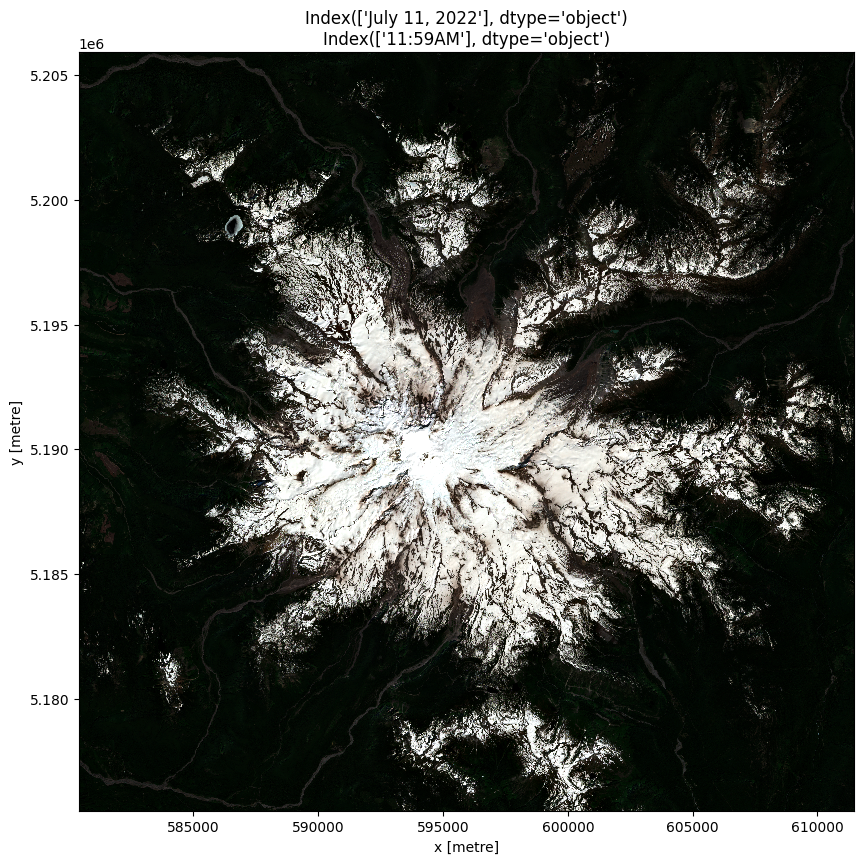

In [8]:
f,ax=plt.subplots(figsize=(10,10))
s2.rgb.squeeze().plot.imshow(robust=True)
ax.set_aspect('equal')
local_time = pd.to_datetime(s2.rgb.time.values).tz_localize('UTC').tz_convert('America/Los_Angeles')
ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}')

### Use easysnowdata to bring in MODIS MOD10A2 product, select 'Maximum_Snow_Extent'. Add WY and DOWY info to the time dimension.

In [9]:
WY_start = 2015
WY_end = 2024
modis_snow_da = easysnowdata.remote_sensing.MODIS_snow(bbox_gdf,
                                                       clip_to_bbox=True,
                                                       start_date=f'{WY_start-1}-10-01', # start_date=f'{WY_start-1}-10-01'
                                                       end_date=f'{WY_end}-09-30',
                                                       data_product="MOD10A2", 
                                                       bands='Maximum_Snow_Extent').data['Maximum_Snow_Extent']

hemisphere='northern'
modis_snow_da.coords['water_year'] = ("time",pd.to_datetime(modis_snow_da.time).map(lambda x: easysnowdata.utils.datetime_to_WY(x, hemisphere=hemisphere)))
modis_snow_da.coords['DOWY'] = ("time",pd.to_datetime(modis_snow_da.time).map(lambda x: easysnowdata.utils.datetime_to_DOWY(x, hemisphere=hemisphere)))

modis_snow_da

Data retrieved. Access with the .data attribute.


<xarray.DataArray 'Maximum_Snow_Extent' (time: 459, y: 66, x: 167)> Size: 5MB
dask.array<Maximum_Snow_Extent, shape=(459, 66, 167), dtype=uint8, chunksize=(1, 66, 167), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 528B 5.226e+06 5.225e+06 ... 5.196e+06 5.196e+06
  * x            (x) float64 1kB -9.294e+06 -9.294e+06 ... -9.218e+06 -9.217e+06
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 4kB 2014-09-30 2014-10-08 ... 2024-09-29
    water_year   (time) int64 4kB 2014 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY         (time) int64 4kB 365 8 16 24 32 40 ... 325 333 341 349 357 365

In [10]:
effective_snow_da = modis_masking.binarize_with_cloud_filling(modis_snow_da)
effective_snow_da

<xarray.DataArray 'Maximum_Snow_Extent' (time: 459, y: 66, x: 167)> Size: 5MB
dask.array<astype, shape=(459, 66, 167), dtype=bool, chunksize=(1, 66, 167), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 528B 5.226e+06 5.225e+06 ... 5.196e+06 5.196e+06
  * x            (x) float64 1kB -9.294e+06 -9.294e+06 ... -9.218e+06 -9.217e+06
  * time         (time) datetime64[ns] 4kB 2014-09-30 2014-10-08 ... 2024-09-29
    water_year   (time) int64 4kB 2014 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY         (time) int64 4kB 365 8 16 24 32 40 ... 325 333 341 349 357 365
    spatial_ref  int64 8B 0

In [11]:
effective_snow_complete_wys_da = modis_masking.align_wy_start(effective_snow_da, hemisphere='northern')
effective_snow_complete_wys_da

<xarray.DataArray 'Maximum_Snow_Extent' (time: 468, y: 66, x: 167)> Size: 10MB
dask.array<astype, shape=(468, 66, 167), dtype=int16, chunksize=(1, 66, 167), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 528B 5.226e+06 5.225e+06 ... 5.196e+06 5.196e+06
  * x            (x) float64 1kB -9.294e+06 -9.294e+06 ... -9.218e+06 -9.217e+06
  * time         (time) datetime64[ns] 4kB 2014-10-01 2014-10-08 ... 2024-09-29
    water_year   (time) int64 4kB 2015 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY         (time) int64 4kB 1 8 16 24 32 40 48 ... 325 333 341 349 357 365
    spatial_ref  int64 8B 0

In [14]:
seasonal_snow_cover_ds = effective_snow_complete_wys_da.groupby('water_year').apply(modis_masking.get_max_consec_snow_days_SAD_SDD_one_WY).compute()
seasonal_snow_cover_ds

<xarray.Dataset> Size: 663kB
Dimensions:               (water_year: 10, y: 66, x: 167)
Coordinates:
  * y                     (y) float64 528B 5.226e+06 5.225e+06 ... 5.196e+06
  * x                     (x) float64 1kB -9.294e+06 -9.294e+06 ... -9.217e+06
    spatial_ref           int64 8B 0
  * water_year            (water_year) int64 80B 2015 2016 2017 ... 2023 2024
Data variables:
    SAD_DOWY              (water_year, y, x) int16 220kB 80 80 80 ... 56 40 56
    SDD_DOWY              (water_year, y, x) int16 220kB 93 93 93 ... 173 173
    max_consec_snow_days  (water_year, y, x) int16 220kB 13 13 13 ... 133 117

In [ ]:
seasonal_snow_cover_ds

In [ ]:
seasonal_snow_cover_ds = seasonal_snow_cover_ds.rio.reproject_match(s2.rgb, resampling=rasterio.enums.Resampling.bilinear)
seasonal_snow_cover_ds

In [ ]:
seasonal_snow_cover_ds['max_consec_snow_days'].plot.imshow(col='water_year',
                                                             col_wrap=5,
                                                             cmap='viridis', 
                                                             vmin=0, 
                                                             vmax=365,)

In [ ]:
# take out WY 2014 still there

In [15]:
import planetary_computer
import pystac_client
import odc.stac

def get_modis_MOD10A2_max_snow_extent(
    vertical_tile, horizontal_tile, start_date, end_date, chunks={"time": -1, "x": 240, "y": 240}
):

    catalog = pystac_client.Client.open(
        "https://planetarycomputer.microsoft.com/api/stac/v1",
        modifier=planetary_computer.sign_inplace,
    )

    search = catalog.search(
        collections=[f"modis-10A2-061"],
        datetime=(start_date, end_date),
        query={
            "modis:vertical-tile": {"eq": vertical_tile},
            "modis:horizontal-tile": {"eq": horizontal_tile},
        },
    )

    load_params = {
        "items": search.item_collection(),
        "bands": "Maximum_Snow_Extent",
        "chunks": chunks,
    }

    modis_snow = odc.stac.load(**load_params)["Maximum_Snow_Extent"]

    return modis_snow

h = 13
v = 2

v = 12
h = 12

hemisphere = "northern" if v < 9 else "southern"
# if hemisphere == "southern":
#     WY_end = 2023
# else:
#     WY_end = 2024
WY_end = 2024

#logger.info(f"Fetching MODIS data for tile {tile}")
if hemisphere == "northern":
    modis_snow_da = modis_masking.get_modis_MOD10A2_max_snow_extent(
        vertical_tile=v,
        horizontal_tile=h,
        start_date=f"{WY_start-1}-10-01",
        end_date=f"{WY_end}-09-30",
        #chunks={"time": -1, "y": 600, "x": 600},
        chunks={"time": 1, "y": 2400, "x": 2400},

    ).chunk({"time": -1, "y": 600, "x": 600})

else:
    modis_snow_da = modis_masking.get_modis_MOD10A2_max_snow_extent(
        vertical_tile=v,
        horizontal_tile=h,
        start_date=f"{WY_start}-04-01",
        end_date=f"{WY_end+1}-03-31",
        #chunks={"time": -1, "y": 600, "x": 600},
        chunks={"time": 1, "y": 2400, "x": 2400},

    ).chunk({"time": -1, "y": 600, "x": 600})

modis_snow_da

<xarray.DataArray 'Maximum_Snow_Extent' (time: 459, y: 2400, x: 2400)> Size: 3GB
dask.array<rechunk-merge, shape=(459, 2400, 2400), dtype=uint8, chunksize=(459, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 19kB -3.336e+06 -3.337e+06 ... -4.448e+06
  * x            (x) float64 19kB -6.671e+06 -6.671e+06 ... -5.56e+06 -5.56e+06
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 4kB 2015-03-30 2015-04-07 ... 2025-03-30

In [16]:
modis_snow_da.coords['water_year'] = ("time",pd.to_datetime(modis_snow_da.time).map(lambda x: easysnowdata.utils.datetime_to_WY(x, hemisphere=hemisphere)))
modis_snow_da.coords['DOWY'] = ("time",pd.to_datetime(modis_snow_da.time).map(lambda x: easysnowdata.utils.datetime_to_DOWY(x, hemisphere=hemisphere)))

modis_snow_da

<xarray.DataArray 'Maximum_Snow_Extent' (time: 459, y: 2400, x: 2400)> Size: 3GB
dask.array<rechunk-merge, shape=(459, 2400, 2400), dtype=uint8, chunksize=(459, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 19kB -3.336e+06 -3.337e+06 ... -4.448e+06
  * x            (x) float64 19kB -6.671e+06 -6.671e+06 ... -5.56e+06 -5.56e+06
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 4kB 2015-03-30 2015-04-07 ... 2025-03-30
    water_year   (time) int64 4kB 2014 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY         (time) int64 4kB 364 7 15 23 31 39 ... 324 332 340 348 356 364

In [17]:
effective_snow_da = modis_masking.binarize_with_cloud_filling(modis_snow_da)
effective_snow_da

<xarray.DataArray 'Maximum_Snow_Extent' (time: 459, y: 2400, x: 2400)> Size: 3GB
dask.array<astype, shape=(459, 2400, 2400), dtype=bool, chunksize=(459, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 19kB -3.336e+06 -3.337e+06 ... -4.448e+06
  * x            (x) float64 19kB -6.671e+06 -6.671e+06 ... -5.56e+06 -5.56e+06
  * time         (time) datetime64[ns] 4kB 2015-03-30 2015-04-07 ... 2025-03-30
    water_year   (time) int64 4kB 2014 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY         (time) int64 4kB 364 7 15 23 31 39 ... 324 332 340 348 356 364
    spatial_ref  int64 8B 0

In [18]:
effective_snow_complete_wys_da = modis_masking.align_wy_start(effective_snow_da, hemisphere=hemisphere)
effective_snow_complete_wys_da

<xarray.DataArray 'Maximum_Snow_Extent' (time: 468, y: 2400, x: 2400)> Size: 5GB
dask.array<astype, shape=(468, 2400, 2400), dtype=int16, chunksize=(23, 600, 600), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 19kB -3.336e+06 -3.337e+06 ... -4.448e+06
  * x            (x) float64 19kB -6.671e+06 -6.671e+06 ... -5.56e+06 -5.56e+06
  * time         (time) datetime64[ns] 4kB 2015-04-01 2015-04-07 ... 2025-03-30
    water_year   (time) int64 4kB 2015 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY         (time) int64 4kB 1 7 15 23 31 39 47 ... 324 332 340 348 356 364
    spatial_ref  int64 8B 0

In [19]:
seasonal_snow_metrics_ds = effective_snow_complete_wys_da.groupby('water_year').apply(modis_masking.get_max_consec_snow_days_SAD_SDD_one_WY).compute()
seasonal_snow_metrics_ds

: 

In [ ]:
modis_snow_da.time.values

In [ ]:
modis_snow_da.DOWY.values

In [ ]:
modis_snow_da = modis_snow_da[(modis_snow_da.WY >= WY_start) & (modis_snow_da.WY <= WY_end)]

In [ ]:
# import pystac
# import planetary_computer
# import rioxarray

# item_url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-10A2-061/items/MOD10A2.A2024329.h13v02.061.2024338043912"

# # Load the individual item metadata and sign the assets
# item = pystac.Item.from_file(item_url)

# signed_item = planetary_computer.sign(item)

# # Open one of the data assets (other asset keys to use: 'Eight_Day_Snow_Cover')
# asset_href = signed_item.assets["Maximum_Snow_Extent"].href
# ds = rioxarray.open_rasterio(asset_href)
# ds

# classes = {
#     0: {"name": "Missing Data", "color": "#FFFFFF"},
#     1: {"name": "No Decision", "color": "#808080"},
#     11: {"name": "Night", "color": "#000000"},
#     25: {"name": "No Snow", "color": "#FFFF00"},
#     37: {"name": "Lake", "color": "#7866EE"},
#     39: {"name": "Ocean", "color": "#3300FF"},
#     50: {"name": "Cloud", "color": "#90ECFF"},
#     100: {"name": "Lake Ice", "color": "#00FF84"},
#     200: {"name": "Snow", "color": "#F200FF"},
#     254: {"name": "Detector Saturated", "color": "#FF6600"},
#     255: {"name": "Fill", "color": "#FF0000"}
# }
# # SEE HOW THE BOUNDS ARE DEFINED!!!!!
# from matplotlib.colors import BoundaryNorm

# class_values = sorted(list(classes.keys()))
# bounds = [(class_values[i] + class_values[i + 1]) / 2 for i in range(len(class_values) - 1)]
# bounds = [class_values[0] - 0.5] + bounds + [class_values[-1] + 0.5]
# norm = BoundaryNorm(bounds, len(classes))
# cmap = plt.cm.colors.ListedColormap([classes[key]["color"] for key in classes.keys()])

# f,ax=plt.subplots()
# ds.squeeze().plot.imshow(cmap=cmap, norm=norm, add_colorbar=False, ax=ax)

# # and create legend based on ....
# # legend_handles = []
# # class_names = []
# # for class_value, class_info in self.attrs["class_info"].items():
# #     legend_handles.append(
# #         plt.Rectangle((0, 0), 1, 1, facecolor=class_info["color"], edgecolor="black")
# #     )
# #     class_names.append(class_info["name"])

# # legend_kwargs = legend_kwargs or {}
# # default_legend_kwargs = {
# #     "bbox_to_anchor": (0.5, -0.1),
# #     "loc": "upper center",
# #     "ncol": len(class_names) // 3,
# #     "frameon": False,
# #     "handlelength": 3.5,
# #     "handleheight": 5,
# # }
# # legend_kwargs = {**default_legend_kwargs, **legend_kwargs}

# # ax.legend(legend_handles, class_names, **legend_kwargs)

# # Create legend based on the classes dictionary
# legend_handles = []
# class_names = []
# for class_value, class_info in classes.items():
#     legend_handles.append(
#         plt.Rectangle((0, 0), 1, 1, facecolor=class_info["color"], edgecolor="black")
#     )
#     class_names.append(class_info["name"])

# legend_kwargs = {
#     "bbox_to_anchor": (0.5, -0.1),
#     "loc": "upper center",
#     "ncol": len(class_names) // 3,
#     "frameon": False,
#     "handlelength": 3.5,
#     "handleheight": 5,
# }
# ax.legend(legend_handles, class_names, **legend_kwargs)


# values, counts = np.unique(ds.squeeze().values, return_counts=True)
# value_counts = pd.Series(counts, index=values).sort_index()
# value_counts

# # plot the values with their counts, make sure to use class names and not values, and color each bar according to the class color from above class definition
# value_counts_colors = [classes[value]["color"] for value in value_counts.index]
# value_counts.index = [classes[value]["name"] for value in value_counts.index]


# value_counts.plot(kind='bar', color=value_counts_colors, figsize=(10, 5))



### What does a time series of MOD10A2 Maximum_Snow_Extent look like for water year 2022? Let's project to UTM 10N for consistency with our Sentinel-2 image above. Values of 25 are no snow, 50 are clouds, 200 are snow. For more values and info, check out the [MOD10A2 user guide](https://nsidc.org/sites/default/files/mod10a2-v006-userguide_1.pdf). 

In [ ]:
modis_snow_da[modis_snow_da['WY']==2022].rio.reproject_match(s2.rgb).plot.imshow(col='time',col_wrap=8)

### Now let's binarize and cloud fill the data.

In [ ]:
effective_snow_da = modis_masking.binarize_with_cloud_filling(modis_snow_da)

In [ ]:
effective_snow_da

### Create seasonal snow presence rasters with snow appearance date, snow disappearance date, and maximum number of consecutive snow days.

In [ ]:
seasonal_snow_presence = get_max_consec_snow_days_SAD_SDD_with_boundary_handling(effective_snow_da, hemisphere='northern').compute()
seasonal_snow_presence

In [ ]:
seasonal_snow_presence = effective_snow_da.groupby('WY').apply(modis_masking.get_max_consec_snow_days_SAD_SDD_one_WY).compute()

In [ ]:
seasonal_snow_presence = seasonal_snow_presence.rio.write_crs(modis_snow_da.rio.crs)

In [ ]:
seasonal_snow_presence.sel(water_year=2015)

### Visualize the seasonal snow presence data for water year 2022.

In [ ]:
f,ax=plt.subplots(2,2,figsize=(8,8))

s2.rgb.squeeze().plot.imshow(ax=ax[0,0],robust=True)
seasonal_snow_presence['max_consec_snow_days'].sel(water_year=2022).rio.reproject_match(s2.rgb).plot(ax=ax[0,1],vmin=0,vmax=366,add_colorbar=False)
seasonal_snow_presence['SAD_DOWY'].sel(water_year=2022).rio.reproject_match(s2.rgb).plot(ax=ax[1,0],vmin=0,vmax=366,add_colorbar=False)
cbar = seasonal_snow_presence['SDD_DOWY'].sel(water_year=2022).rio.reproject_match(s2.rgb).plot(ax=ax[1,1],vmin=0,vmax=366,add_colorbar=False)

ax[0,0].set_title('Sentinel-2 RGB')
ax[0,1].set_title('Consecutive snow days\n[days]')
ax[1,0].set_title('Snow appearance date\n[DOWY]')
ax[1,1].set_title('Snow disappearance date\n[DOWY]')

for axs in ax.flatten():
    axs.set_aspect('equal')
    axs.axis('off')

f.suptitle('Snow presence at Mt. Rainier for water year 2022')
f.tight_layout()

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.036, 0.05, 0.85])
f.colorbar(cbar, cax=cbar_ax,label='DOWY / days')

In [ ]:
f,ax=plt.subplots(2,2,figsize=(8,8))

s2.rgb.squeeze().plot.imshow(ax=ax[0,0],robust=True)
seasonal_snow_presence['max_consec_snow_days'].sel(water_year=2022).rio.reproject_match(s2.rgb, resampling=rasterio.enums.Resampling.bilinear).plot(ax=ax[0,1],vmin=0,vmax=366,add_colorbar=False)
seasonal_snow_presence['SAD_DOWY'].sel(water_year=2022).rio.reproject_match(s2.rgb, resampling=rasterio.enums.Resampling.bilinear).plot(ax=ax[1,0],vmin=0,vmax=366,add_colorbar=False)
cbar = seasonal_snow_presence['SDD_DOWY'].sel(water_year=2022).rio.reproject_match(s2.rgb, resampling=rasterio.enums.Resampling.bilinear).plot(ax=ax[1,1],vmin=0,vmax=366,add_colorbar=False)

ax[0,0].set_title('Sentinel-2 RGB')
ax[0,1].set_title('Consecutive snow days\n[days]')
ax[1,0].set_title('Snow appearance date\n[DOWY]')
ax[1,1].set_title('Snow disappearance date\n[DOWY]')

for axs in ax.flatten():
    axs.set_aspect('equal')
    axs.axis('off')

f.suptitle('Snow presence at Mt. Rainier for water year 2022')
f.tight_layout()

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.036, 0.05, 0.85])
f.colorbar(cbar, cax=cbar_ax,label='DOWY / days')

### Save as a zarr file and test we can open it again.

In [ ]:
seasonal_snow_presence.to_zarr('output/demo/seasonal_snow_presence_rainier.zarr',mode='w')

In [ ]:
seasonal_snow_presence_from_zarr = xr.open_zarr('output/demo/seasonal_snow_presence_rainier.zarr',mask_and_scale=False)

In [ ]:
seasonal_snow_presence_from_zarr

In [ ]:
seasonal_snow_presence_from_zarr.sel(WY=2016)['max_consec_snow_days'].plot.imshow()

### That's it! Time to do some global processing...